# Questão 6

## Aproxime a $g(x) = αx^{2}$  dos dados da Tabela 2, utilizando para isso o Método dos Mínimos Quadrados.

| x | -1,000 | -0,750 | -0,600 | -0,500 | -0,300 | 0,000 | 0,200 | 0,400 | 0,500 | 0,700 | 1,000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| f(x) | 2,050 | 1,153 | 0,450 | 0,400 | 0,500 | 0,000 | 0,200 | 0,600 | 0,512 | 1,200 | 2,050 |

### <div align="center">Tabela 2: Dados.</div>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import scipy.linalg as spla
import statistics

In [13]:
x_sample = np.array([-1.000, -0.750, -0.600, -0.500, -0.300 ,0.000, 0.200, 0.400, 0.500, 0.700, 1.000])
y_sample = np.array([2.050, 1.153, 0.450, 0.400, 0.500, 0.000, 0.200, 0.600, 0.512, 1.200, 2.050])

print(x_sample)
print(y_sample)

[-1.   -0.75 -0.6  -0.5  -0.3   0.    0.2   0.4   0.5   0.7   1.  ]
[2.05  1.153 0.45  0.4   0.5   0.    0.2   0.6   0.512 1.2   2.05 ]


In [19]:
def mmq(x, y):
    g1_x = x
    g2_x = np.ones(len(x), dtype=int)
    
    g1_x_g1_x = g1_x**2
    g1_x_g2_x = g1_x * g2_x
    g2_x_g1_x = g2_x * g1_x
    g2_x_g2_x = g2_x**2
    
    f_x_g1_x = y * g1_x
    f_x_g2_x = y * g2_x
    
    soma_g1_x_g1_x = np.sum(g1_x_g1_x)
    soma_g1_x_g2_x = np.sum(g1_x_g2_x)
    soma_g2_x_g1_x = np.sum(g2_x_g1_x)
    soma_g2_x_g2_x = np.sum(g2_x_g2_x)
    soma_f_x_g1_x = np.sum(f_x_g1_x)
    soma_f_x_g2_x = np.sum(f_x_g2_x)
    
    Matriz_A = np.matrix([
                            [soma_g1_x_g1_x, soma_g1_x_g2_x],
                            [soma_g2_x_g1_x, soma_g2_x_g2_x]
                         ])
    Vetor_B = np.array([soma_f_x_g1_x, soma_f_x_g2_x])
    
    aux_A00 = Matriz_A[0,0] / Matriz_A[0,0]
    aux_A01 = Matriz_A[0,1] / Matriz_A[0,0]
    aux_B = Vetor_B[0] / Matriz_A[0,0]
    
    aux1 = Matriz_A[1,0] - Matriz_A[1,0] * aux_A00
    aux2 = Matriz_A[1,1] - Matriz_A[1,0] * aux_A01
    aux3 = Vetor_B[1] - Matriz_A[1,0] * aux_B
    
    b = aux3 / aux2
    a = aux_B - (b * aux_A01)
    
    return(a, b)

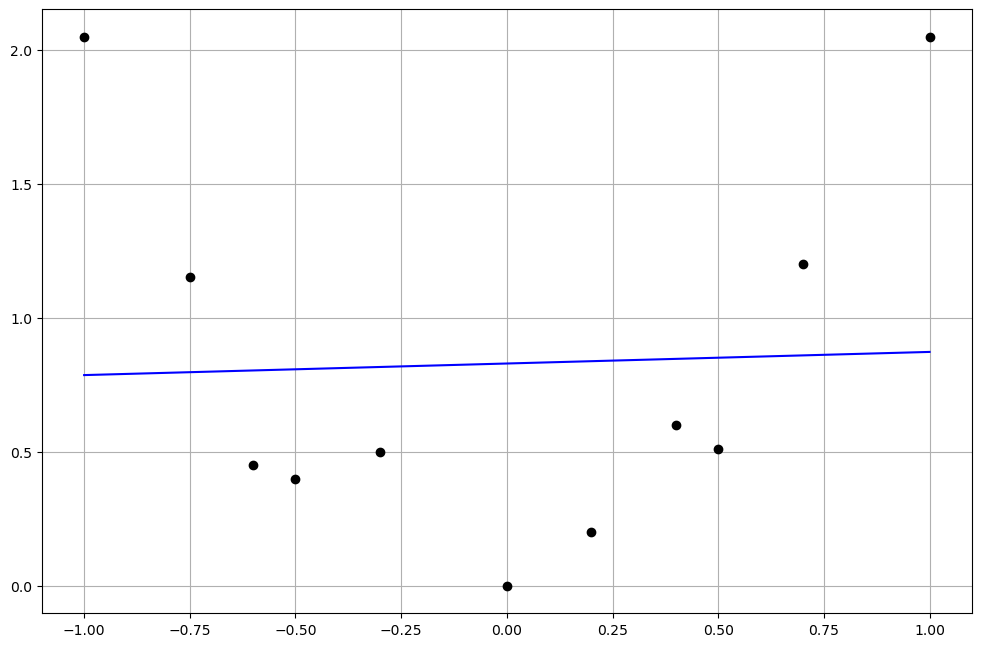

In [20]:
a,b = mmq(x_sample, y_sample)

fig = plt.figure(figsize=(12,8), dpi= 100)
ax = plt.axes()
x = x_sample
y = a*x+b

plt.plot(x_sample, y_sample, 'o', color='black');
plt.plot(x, y, color='blue');

plt.grid()
plt.show()